# Guided Project: Predicting Insurance Costs

Our goal in the guided project is to construct the best possible predictive model for the cost, given some information about the patient. Predicting medical costs is an important task because it allows hospitals to predict revenue and plan necessary procedures needed by its patient population.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
#read the data into a pandas dataframe.
insurance = pd.read_csv('insurance.csv')

In [4]:
#Display the first five rows of the dataframe.
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Print out the number of features and observations in the dataset.
insurance.shape

(1338, 7)

In [6]:
# Print data types and null counts for each column.
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Count the number of nulls.
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Convert the categorical features into dummy variables.
dummies_data = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)

In [9]:
#Describe the data
dummies_data.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


There are no missing values in the data.
All the columns are numeric (after converting).
The average age of the patients is 39, the younger is 18, and the older is 64.
50% of the data are male, and 50% are female.
20% of the data are smoking.
The average charge is 13270, the higher is 63770, and the lower is 1121.

In [10]:
#Print the correlation of all the columns.
correlation = dummies_data.corr()
correlation['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

<AxesSubplot:>

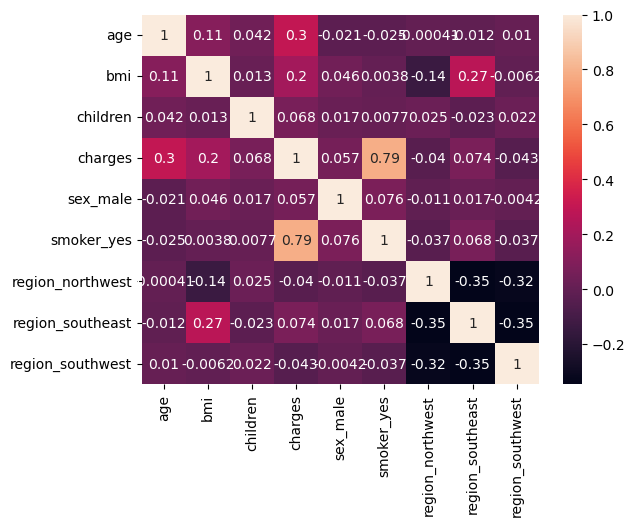

In [11]:
#Create heatmap
sns.heatmap(correlation, annot=True)

Text(0.5, 0.98, 'Boxplot of charges by smoker')

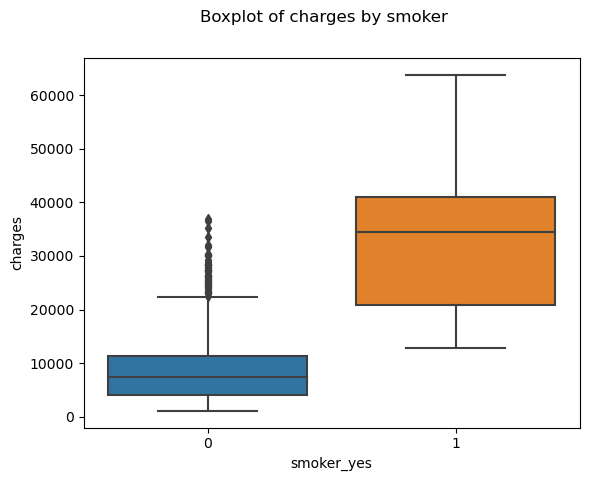

In [12]:
# The "smoker" variable has the highest correlation with the "charges" variable. Plot a boxplot in order to find the differences in charges between smokers and non-smokers.
sns.boxplot(data = dummies_data, x = 'smoker_yes', y = 'charges')
plt.suptitle("Boxplot of charges by smoker")

In [13]:
# Create a new column which will divide the charges column to two categories.
avg_charges = dummies_data['charges'].mean()
dummies_data['charges_categories'] = dummies_data['charges'].apply(lambda x: 1 if x > avg_charges else 0)

Text(0.5, 0.98, 'Histogram of the bmi column')

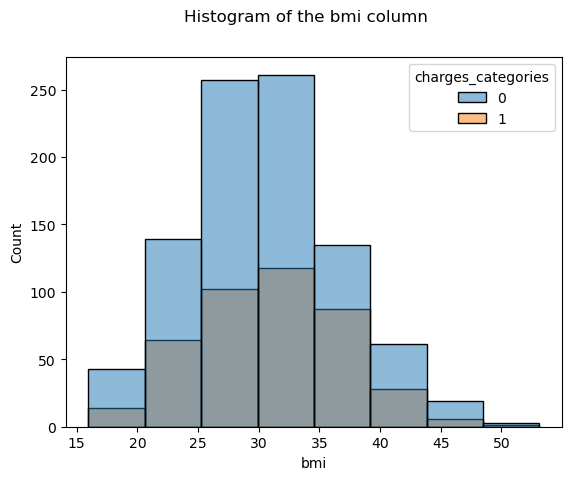

In [14]:
# Plot an histogram of the bmi column, grouped by charges.
sns.histplot(data=dummies_data, x="bmi", bins=8, hue='charges_categories')
plt.suptitle("Histogram of the bmi column")

Text(0.5, 0.98, 'Histogram of the age column')

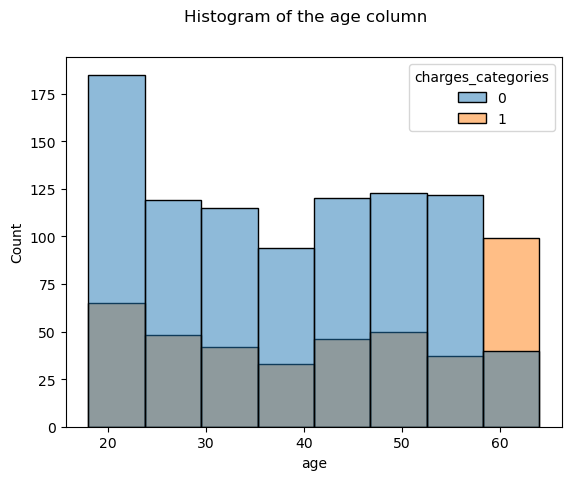

In [15]:
# Plot an histogram of the age column, grouped by charges.
sns.histplot(data=dummies_data, x="age", bins=8, hue='charges_categories')
plt.suptitle("Histogram of the age column")

The correlated columns are 'smoker', 'age', 'bmi'.

In [16]:
#Drop uncorrelated columns.
corr_data = dummies_data.drop(['children', 'sex_male','region_northwest', 'region_southeast', 'region_southwest'], axis = 1)

In [17]:
# Split the data into features and labels.
X = corr_data.drop('charges', axis = 1)
y = corr_data['charges']

In [18]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=417)

In [19]:
#Normalize the data.
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [20]:
# Instantiate linear Regression model fit linear regression mode.
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
# Obtain predictions for train set.
train_predictions = lr.predict(X_train_scaled)

In [22]:
# Obtain R Squared Score of train set.
r = lr.score(X_train_scaled, y_train)
print("R-square score:",r)

R-square score: 0.8128285189802766


In [23]:
# Obtain MSE of train set.
MSE = mean_squared_error(y_train, train_predictions)
print("MSE:",MSE)

MSE: 27414883.564157434


In [24]:
# Obtain the RMSE of train set.
RMSE = mean_squared_error(y_train, train_predictions, squared = False)
print("RMSE:",RMSE)

RMSE: 5235.922417698474


In [25]:
# Obtain the MAE of train set.
MAE = mean_absolute_error(y_train, train_predictions)
print("MAE:",MAE)

MAE: 3729.3133102230736


The R-squared score of 0.8128 indicates that approximately 81.28% of the variance in the target variable (y_train) can be explained by the independent variables (X_train_scaled). This suggests that the model is able to capture a significant portion of the variation in the data and has a reasonably good fit.

The MSE of 27414883.56 suggests that, on average, the predictions have an error of approximately 27414883.56 units squared.

The RMSE value of 5235.92 suggests that, on average, the predictions have an error of approximately 5235.92 units.

The MAE value of 3729.31 suggests that, on average, the predictions deviate from the actual values by approximately 3729.31 units.

Overall, the provided metrics indicate that the model has a reasonably good fit to the training data and is capable of making predictions with a moderate level of accuracy.

In [26]:
# Obtain the residuals.
residuals = y_train - train_predictions

Text(0, 0.5, 'Residual')

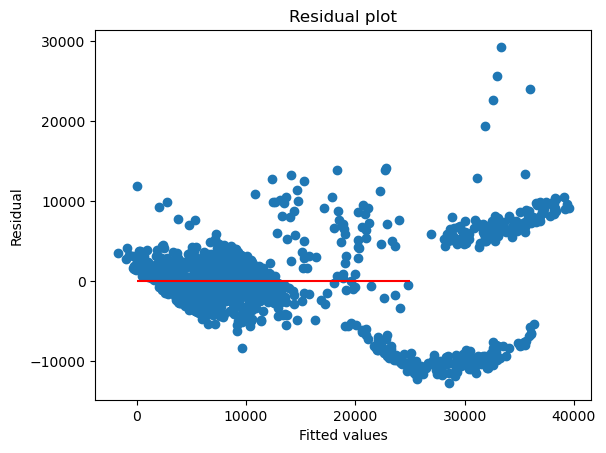

In [27]:
# Plot residuals
plt.scatter(train_predictions, residuals)
plt.hlines(y=0, xmin = 0, xmax = 25000, colors='red') 
plt.title('Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual')

According to the information we have, this is a good model, in the low numbers it is really good, the values are evenly distributed near 0 and really stick to it, on the other hand, in the high numbers it becomes worser and there are many outliers, in addition there are more values above 0 than below 0.

In [28]:
# print the intercept.
print("Intercept:", lr.intercept_)

Intercept: -1734.745636079455


The intercept of -1734.7456 represents the baseline or starting point of the dependent variable (y) when all independent variables (X) are zero. In this case, it suggests that the average or expected value of the dependent variable is -1734.7456 when there is no effect from the independent variables.

In [29]:
# print the coefficients.
print("Coefficients:", lr.coef_)

Coefficients: [ 9079.91751888 11342.12132969 14648.71312089 10699.85769246]


All the coefficients being positive indicates that each independent variable has a positive relationship with the dependent variable. As the values of the independent variables increase, the dependent variable tends to increase as well. The large magnitudes of the coefficients suggest that these independent variables have a significant positive impact on the dependent variable.

In [30]:
# Obtain predictions and MSE for test set.
predictions = lr.predict(X_test_scaled)
MSE_test = mean_squared_error(y_test, predictions)
print("MSE:",MSE_test)

MSE: 28916454.74220149


In [31]:
# Obtain RMSE, MAE and R Squared for test set.
RMSE_test = mean_squared_error(y_test, predictions, squared = False)
print("RMSE:",RMSE_test)
MAE_test = mean_absolute_error(y_test, predictions)
print("MAE:",MAE_test)
r_test = lr.score(X_test_scaled, y_test)
print("R-square score:",r_test)


RMSE: 5377.402229906323
MAE: 3942.756525926995
R-square score: 0.8030740270046808


### Final conclusion

The model demonstrates good performance based on the evaluation metrics, with relatively high R-square scores and relatively low MSE, RMSE, and MAE values. The positive coefficients indicate that all independent variables have a positive influence on the dependent variable. But if we have more data we could improve the model.